In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pyxdf as xdf
import seaborn as sns

In [2]:

def select_lsl_stream(stream_name, streams):
    # Extract data, time, and sample rate from xdf file (lab streaming layer)
    #  monogen: all variables at 8 Hz
    #  markers: Important events
    #  status : all variables on every important event (marker)
    #  kinect : XYZ pose coordinates at 60 Hz
    stream_list = streams[0]  
    for stream in stream_list:
        if stream['info']['name'][0] ==  stream_name:  
            return stream['time_series'], stream['time_stamps'], stream['info']['effective_srate']            
    return False

In [3]:
import glob

# Columns are renamed to our convenience.  Please see data_dictionary.xlsx for more information
columns = ['density', 'evenness', 'syncopation', 'swing', 'cursor_position', 'bangBack', 'S_kick-snare', 'encuesta', 'valorA', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'momento_significativo', 'kick-snare', 'knob_start_value', 'trainorexperiment', 'pleasure', 'urgetomove']
df_all = pd.DataFrame(columns = columns) # Define an empty dataframe to store data from all participants
df_all['participant'] = '' # here we'll store the participant as the xdf file name

for xdf_file in glob.glob("data/*.xdf"): # loop over all data from all participants on /data directory
    
    # load xdf file and decompose in 4 streams: kinect, monogen, status, markers
    streams = xdf.load_xdf(xdf_file)
    # decompose the status stream, it has information from the experiment every time a marker is sent
    status_time_series, status_timestamps, status_sample_rate = select_lsl_stream('status', streams) 
    df = pd.DataFrame(status_time_series, columns = columns)
    # we get information when rating is finished, that is when resting stage begins (momento_signitificativo==2)
    df_out = df.loc[df['momento_significativo'] == 2]
    # we add the participant code (just in case)
    df_out['participant'] = xdf_file
    df_all = pd.concat([df_all, df_out])
    print(xdf_file)

Stream 3: Calculated effective sampling rate 53.1472 Hz is different from specified rate 60.0000 Hz.
<ipython-input-3-e6cc36ec2c5b>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['participant'] = xdf_file


data/P09.xdf
data/P08.xdf
data/P05.xdf
data/P10.xdf
data/P04.xdf
data/P06.xdf


Stream 3: Calculated effective sampling rate 6.1893 Hz is different from specified rate 8.0000 Hz.


data/P07.xdf
data/P03.xdf
data/P02.xdf
data/P01.xdf


In [4]:
# now we analyse only some variables
columns_selected = ['evenness', 'syncopation', 'swing', 'pleasure', 'urgetomove']    
df = df_all[columns_selected]

In [5]:
# convert pleasue and urgetomove to their original data types
df = df.astype({'urgetomove':'int', 'pleasure':'int'}) 
df

,evenness,syncopation,swing,pleasure,urgetomove
3,0.675,0.650,69.375,5,3
7,0.450,0.400,54.375,3,3
11,0.775,0.350,58.125,6,5
15,0.275,1.000,70.625,3,3
21,0.750,0.875,69.375,4,4
...,...,...,...,...,...
31,0.000,0.125,50.000,3,6
35,0.125,0.125,53.125,4,6
39,0.725,0.525,64.375,7,7
45,0.300,0.875,69.375,7,6


In [6]:
df.describe()

,evenness,syncopation,swing,pleasure,urgetomove
count,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.537609,0.556087,63.315216,4.886957,4.895652
std,0.200640,0.259461,7.055628,1.620944,1.773953
min,0.000000,0.000000,50.000000,1.000000,1.000000
25%,0.412500,0.400000,58.125000,4.000000,3.000000
50%,0.500000,0.550000,62.500000,5.000000,5.000000
75%,0.675000,0.787500,69.375000,6.000000,6.000000
max,1.000000,1.000000,75.000000,7.000000,7.000000


In [7]:
# compute spearman correlation
corr = df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,evenness,syncopation,swing,pleasure,urgetomove
evenness,1.00,0.26,0.23,0.05,0.05
syncopation,0.26,1.00,0.03,0.08,-0.02
swing,0.23,0.03,1.00,0.03,-0.05
pleasure,0.05,0.08,0.03,1.00,0.84
urgetomove,0.05,-0.02,-0.05,0.84,1.00


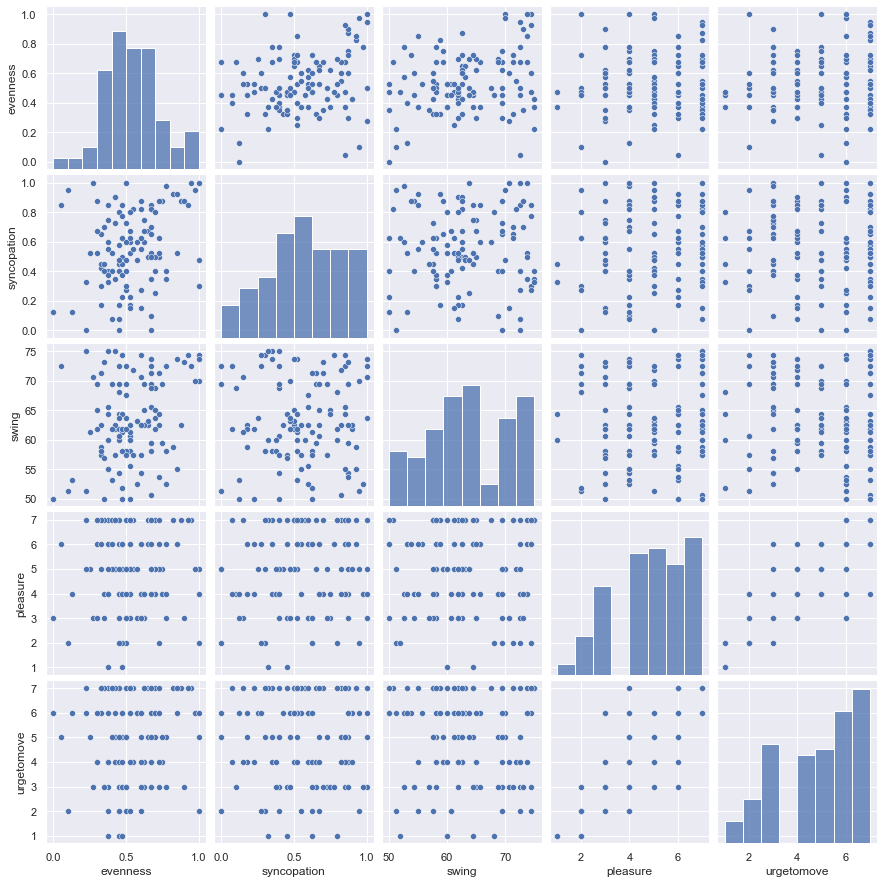

In [8]:
sns.set_theme()
sns.pairplot(df)

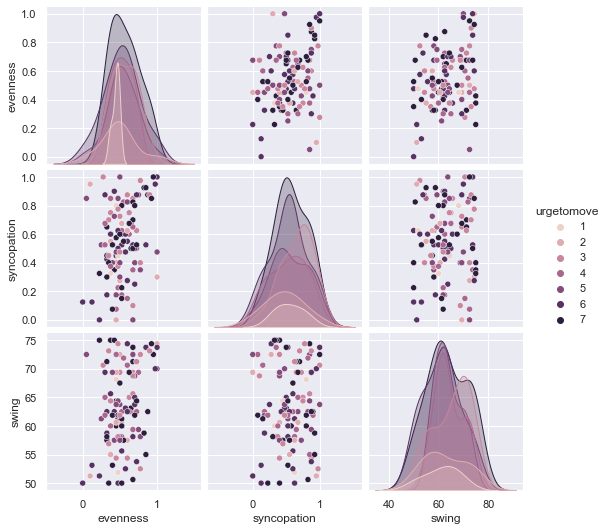

In [9]:
dfu=df.drop(columns=["pleasure"])
sns.pairplot(dfu, hue='urgetomove')

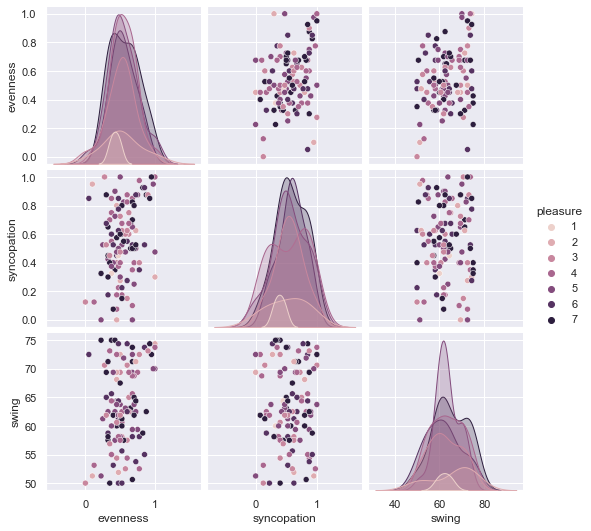

In [11]:
dfv=df.drop(columns=["urgetomove"])
sns.pairplot(dfv, hue='pleasure')

<AxesSubplot:xlabel='evenness', ylabel='syncopation'>

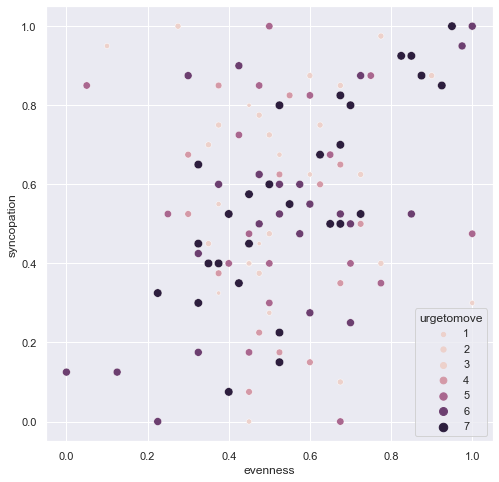

In [16]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='evenness', y='syncopation', data=df, hue='urgetomove', size="urgetomove", hue_norm=(3, 7))

<AxesSubplot:xlabel='evenness', ylabel='syncopation'>

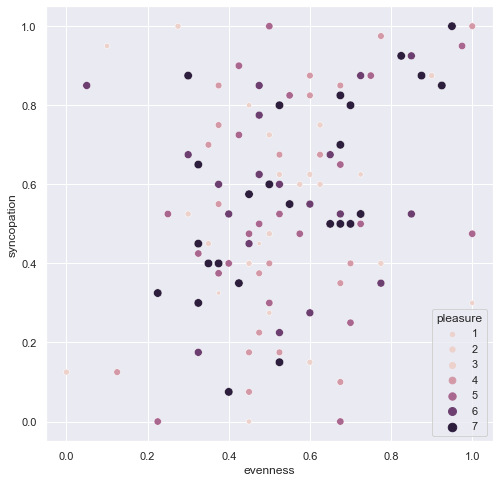

In [17]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='evenness', y='syncopation', data=df, hue='pleasure', size="pleasure", hue_norm=(3, 7))

<AxesSubplot:xlabel='urgetomove', ylabel='evenness'>

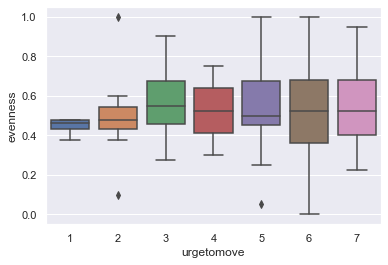

In [18]:
#plt.figure(figsize=(15,7))
sns.boxplot(y="evenness", x="urgetomove", data=df)

<AxesSubplot:xlabel='urgetomove', ylabel='syncopation'>

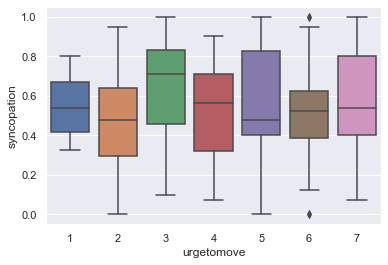

In [19]:
sns.boxplot(y="syncopation", x="urgetomove", data=df)

<AxesSubplot:xlabel='urgetomove', ylabel='swing'>

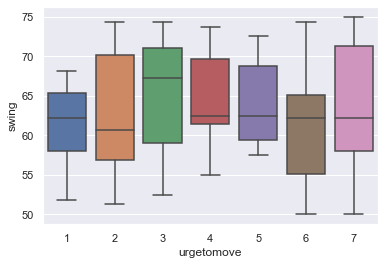

In [20]:
sns.boxplot(y="swing", x="urgetomove", data=df)

<AxesSubplot:xlabel='pleasure', ylabel='evenness'>

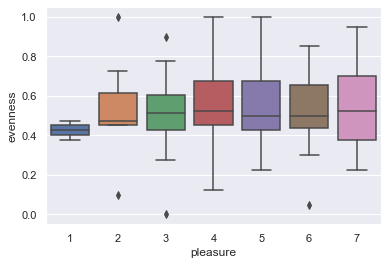

In [21]:
sns.boxplot(y="evenness", x="pleasure", data=df)

<AxesSubplot:xlabel='pleasure', ylabel='syncopation'>

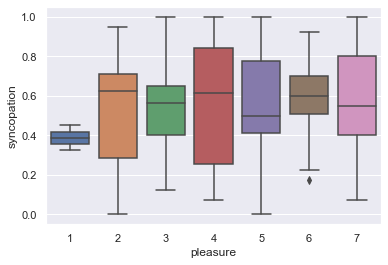

In [22]:
sns.boxplot(y="syncopation", x="pleasure", data=df)

<AxesSubplot:xlabel='pleasure', ylabel='swing'>

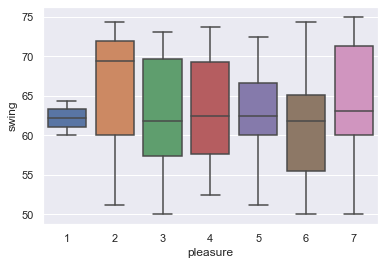

In [23]:
sns.boxplot(y="swing", x="pleasure", data=df)